# Project: How Economic and Educational Aspects Affect Population's Mental Health

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Using the available data in [Gapminder](https://www.gapminder.org/data/), I will try to see how much different aspects from a country regarding the *economy* and *education* can affect the *mental health* from local population, regarding estimated suicidals per year.

The datasets are separated, thus a process of merging and cleaning is needed in order to correlate the different variables from a country, during the years.

### Datasets used

**1. Population, total:** total population in the country, per year.

**2. Suicide, total deaths:** total number of estimated deaths from self-inflicted injury, per country and year.

**3. GDP per capita (U$S, inflation-adjusted):** [Gross Domestic Product](https://www.investopedia.com/terms/g/gdp.asp) divided by midyear population, in constant 2010 U.S. Dollars for better comparison between years, per country and year.

**4. Mean years in school (men 25 years and older):** the average number of years of school attended by all males older than 24 years, including primary, secondary and tertiary education.

**5. Mean years in school (women 25 years and older):** the average number of years of school attended by all females older than 24 years, including primary, secondary and tertiary education.

**6. Geo Countries:** a dataset to match each country with its respective continent.

### Questions

**1.** How the suicidal numbers growing worldwide over the time? Are they following the same pattern as the total population?

**2.** Is there any relation between economic and suicidal numbers of the countries? And what about educational level?

**3.** If we separate the suicidal rate for each continent, how different each one behaves during the period?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df_suicides_total = pd.read_csv('suicide_total_deaths.csv')
df_population = pd.read_csv('population_total.csv')
df_gdp_per_capita = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
df_school_men = pd.read_csv('mean_years_in_school_men_25_years_and_older.csv')
df_school_women = pd.read_csv('mean_years_in_school_women_25_years_and_older.csv')
df_country = pd.read_csv('ddf--entities--geo--country.csv', usecols=['name', 'world_4region'])

print('df_suicides_total: \t', df_suicides_total.shape)
print('df_population:\t\t', df_population.shape)
print('df_gdp_per_capita:\t', df_gdp_per_capita.shape)
print('df_school_men:\t\t', df_school_men.shape)
print('df_school_women:\t', df_school_women.shape)
print('df_country:\t\t', df_country.shape)

df_suicides_total: 	 (194, 28)
df_population:		 (197, 302)
df_gdp_per_capita:	 (206, 61)
df_school_men:		 (175, 41)
df_school_women:	 (175, 41)
df_country:		 (273, 2)


In [3]:
df_country.head()

,name,world_4region
0,Abkhazia,europe
1,Aruba,americas
2,Afghanistan,asia
3,Angola,africa
4,Anguilla,americas


In [4]:
df_suicides_total.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,703,754,820,894,977,1050,1100,1130,1170,...,1680,1710,1750,1760,1810,1870,1990,2080,2170,2250
1,Angola,645,653,667,700,735,756,738,738,816,...,1040,1060,1080,1100,1120,1140,1170,1200,1220,1230
2,Albania,127,130,131,135,136,142,150,162,170,...,204,205,201,195,191,188,186,184,183,181
3,Andorra,5.45,5.82,6.18,6.33,6.36,6.17,6.04,6.28,6.24,...,7.39,7.53,7.67,7.76,7.85,7.92,7.97,7.72,7.78,7.84
4,United Arab Emirates,70.8,77.6,84.2,91.7,99.2,111,117,125,129,...,347,312,358,399,423,436,443,445,446,445


First thing to note is that we have different shapes in all DataFrames, which means that some of them have more _countries_ and/or _years_ than others. As our central object of study is the **mental health** (suicide numbers), we should stick to the countries and years available in the `df_suicide`.

Also, considering that for making the analysis we should have only one with all the features, the first thing to tackle is merging them.

In [5]:
# Checking if the shape (columns and lines) of both Mean School Years are the same
#    If they are the same, we can get the mean for total population by concatenating
#    and then grouping by country and year
print(df_school_men.shape == df_school_women.shape)
print(df_school_men.shape)

True
(175, 41)


In [6]:
df_school = pd.concat([df_school_men, df_school_women])
df_school = df_school.groupby(['country'], as_index=False).mean()
df_school.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.35,0.40,0.45,0.45,0.45,0.50,0.50,0.50,0.55,...,1.15,1.20,1.25,1.30,1.30,1.35,1.35,1.40,1.45,1.50
1,Albania,4.50,4.60,4.70,4.85,4.95,5.10,5.25,5.35,5.45,...,8.55,8.70,8.85,9.00,9.10,9.30,9.40,9.55,9.65,9.80
2,Algeria,0.75,0.75,0.80,0.90,0.90,1.00,1.00,1.10,1.15,...,3.35,3.45,3.55,3.70,3.80,3.95,4.10,4.20,4.30,4.45
3,Angola,0.95,1.00,1.00,1.05,1.15,1.15,1.20,1.30,1.35,...,2.95,3.05,3.20,3.30,3.40,3.50,3.60,3.75,3.85,3.95
4,Antigua and Barbuda,7.00,7.10,7.20,7.40,7.50,7.65,7.80,7.95,8.10,...,11.10,11.25,11.35,11.45,11.55,11.65,11.70,11.80,11.90,12.00


Now that we have all the DataFrames on the same shape, we need to reshape all of them in order to each DataFrame have the shape of a feature by **country** and **year**, instead of a table of country and years for each feature.

This can be done by _stacking_ them, and making the country a _index_. This will make the DataFrame go into a vertical form, instead of the original horizontal form. With all the DataFrames in the desired shape, we can then merge them into one big DataFrame with different features for each country and year.

In [7]:
def restructure_dataframe(df, feature_name):
    return df.set_index('country').stack().reset_index(name=feature_name).rename(columns={'level_1': 'year'})

In [8]:
# Feature: suicides_total
df_ft_suicides_total = restructure_dataframe(df_suicides_total, 'suicides_total')
df_ft_suicides_total.head()

,country,year,suicides_total
0,Afghanistan,1990,703
1,Afghanistan,1991,754
2,Afghanistan,1992,820
3,Afghanistan,1993,894
4,Afghanistan,1994,977


In [9]:
# Feature: population_total
df_ft_population_total = restructure_dataframe(df_population, 'population_total')
df_ft_population_total.head()

,country,year,population_total
0,Afghanistan,1799,3.28M
1,Afghanistan,1800,3.28M
2,Afghanistan,1801,3.28M
3,Afghanistan,1802,3.28M
4,Afghanistan,1803,3.28M


In [10]:
# Feature: gdp_per_capita
df_ft_gdp_per_capita = restructure_dataframe(df_gdp_per_capita, 'gdp_per_capita')
df_ft_gdp_per_capita.head()

,country,year,gdp_per_capita
0,Aruba,1986,15.7k
1,Aruba,1987,18.4k
2,Aruba,1988,22.1k
3,Aruba,1989,24.8k
4,Aruba,1990,25.4k


In [11]:
# Feature: mean_school_years
df_ft_mean_school_years = restructure_dataframe(df_school, 'mean_school_years')
df_ft_mean_school_years.head()

,country,year,mean_school_years
0,Afghanistan,1970,0.35
1,Afghanistan,1971,0.40
2,Afghanistan,1972,0.45
3,Afghanistan,1973,0.45
4,Afghanistan,1974,0.45


In [12]:
df = df_ft_suicides_total.copy()

features = [df_ft_gdp_per_capita, df_ft_mean_school_years, df_ft_population_total]

for feature in features:
    df = df.merge(
        feature,
        how='left',
        on=['country', 'year']
    )

df.head()

,country,year,suicides_total,gdp_per_capita,mean_school_years,population_total
0,Afghanistan,1990,703,NaN,0.80,12.4M
1,Afghanistan,1991,754,NaN,0.90,13.3M
2,Afghanistan,1992,820,NaN,0.90,14.5M
3,Afghanistan,1993,894,NaN,0.95,15.8M
4,Afghanistan,1994,977,NaN,1.00,17.1M


The last part of it was merging together all dataframes, in order to have only one big dataframe with the wanted features, all united by the keys **country** and **year**.

As already commented, the merging was initiated by the dataframe with the _suicides_ feature, as it has a smaller universe of years, and is our main object of study. Usign a **LEFT JOIN** with all other dataframes, we avoid having `NaN` at suicides caused by years and countries with no data from other dataframes (especially the _population_ dataframe, that is the biggest one).

In [13]:
df_country.rename(columns={'name': 'country', 'world_4region': 'continent'}, inplace=True)
df_country.continent = df_country.continent.str.capitalize()

df = df.merge(df_country, how='left', on='country')
df.head()

,country,year,suicides_total,gdp_per_capita,mean_school_years,population_total,continent
0,Afghanistan,1990,703,NaN,0.80,12.4M,Asia
1,Afghanistan,1991,754,NaN,0.90,13.3M,Asia
2,Afghanistan,1992,820,NaN,0.90,14.5M,Asia
3,Afghanistan,1993,894,NaN,0.95,15.8M,Asia
4,Afghanistan,1994,977,NaN,1.00,17.1M,Asia


In [14]:
any(df.continent.isna())

False

The last part was including the column for continent for each country. Before merging both datasets, I renamed the columns on the `df_country` to match the _country_ column from the big dataset, and this way avoid duplicating columns by setting different columns to use as keys on merge. Also, to have everything in the same shape, I capitalized the name of the continents, so it will appear better on the visualizations.

### Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5238 entries, 0 to 5237
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            5238 non-null   object 
 1   year               5238 non-null   object 
 2   suicides_total     5238 non-null   object 
 3   gdp_per_capita     4916 non-null   object 
 4   mean_school_years  3500 non-null   float64
 5   population_total   5076 non-null   object 
 6   continent          5238 non-null   object 
dtypes: float64(1), object(6)
memory usage: 327.4+ KB


As we can see, the only feature that is correctly a `float` is the `mean_school_years`. All the others are stored as a string, what difficults our further analysis. 

In [16]:
df.head()

,country,year,suicides_total,gdp_per_capita,mean_school_years,population_total,continent
0,Afghanistan,1990,703,NaN,0.80,12.4M,Asia
1,Afghanistan,1991,754,NaN,0.90,13.3M,Asia
2,Afghanistan,1992,820,NaN,0.90,14.5M,Asia
3,Afghanistan,1993,894,NaN,0.95,15.8M,Asia
4,Afghanistan,1994,977,NaN,1.00,17.1M,Asia


In [17]:
# Changing the year and suicides_total columns is just converting to int (small integer number)
df.year = df.year.astype('int')

In [18]:
df.dropna(inplace=True)

Because we have some _NaN_ data, I decided to drop them all because using the average could lead to bad conclusions, as poor and uneducated countries could been taken as middle-tier countries. Dropping the missing data will only remove data from small countries, that usually are not so expressive on worldwide studies.

In [19]:
replace_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9'}

df.suicides_total = df.suicides_total.replace(replace_dict, regex=True).map(pd.eval).astype(float)
df.gdp_per_capita = df.gdp_per_capita.replace(replace_dict, regex=True).map(pd.eval).astype(float)
df.population_total = df.population_total.replace(replace_dict, regex=True).map(pd.eval).astype(float)
df.head()

,country,year,suicides_total,gdp_per_capita,mean_school_years,population_total,continent
12,Afghanistan,2002,1360.0,330.0,1.25,22600000.0,Asia
13,Afghanistan,2003,1450.0,343.0,1.30,23700000.0,Asia
14,Afghanistan,2004,1530.0,333.0,1.30,24700000.0,Asia
15,Afghanistan,2005,1600.0,357.0,1.35,25700000.0,Asia
16,Afghanistan,2006,1650.0,365.0,1.35,26400000.0,Asia


In [20]:
df.describe()

,year,suicides_total,gdp_per_capita,mean_school_years,population_total
count,3306.000000,3306.000000,3306.000000,3306.000000,3.306000e+03
mean,1999.716576,5001.475387,10462.252571,6.826407,3.617885e+07
std,5.720611,23164.040060,16303.886087,3.420012,1.317807e+08
min,1990.000000,1.270000,164.000000,0.400000,4.730000e+04
25%,1995.000000,196.000000,1120.000000,3.900000,2.755000e+06
50%,2000.000000,665.500000,3295.000000,6.700000,8.100000e+06
75%,2005.000000,2197.500000,10100.000000,9.900000,2.357500e+07
max,2009.000000,249000.000000,112000.000000,14.200000,1.360000e+09


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3306 entries, 12 to 5230
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            3306 non-null   object 
 1   year               3306 non-null   int32  
 2   suicides_total     3306 non-null   float64
 3   gdp_per_capita     3306 non-null   float64
 4   mean_school_years  3306 non-null   float64
 5   population_total   3306 non-null   float64
 6   continent          3306 non-null   object 
dtypes: float64(4), int32(1), object(2)
memory usage: 193.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### 1. How the suicidal numbers are growing worldwide over the time? Are they following the population growth?

We can clearly see three different phases in the **suicide numbers** between 1990 and 2009 looking at its line chart:

1. Between _1990_ and _1995_ the number is increasing at a very high rate, almost 20.000 more cases per year, which shows a much more accentuated growth than population growth during the same period.

2. Between _1995_ and _2005_ the line changes to an horizontal one with peaks and valleys depending on the year. Besides having better and worse years during this period, the trendline of the period would be almost horizontal, but with a small declination, which means the **suicide numbers** started to decrease during this period, on average.

3. Between _2005_ and _2009_ the line completely changes to full decreasing one, reducing around 10.000 cases per year during the period.

If we compare the **population** line during the same period, it is basically stable at a 50.000.000 growth per year. If we look at a scatterplot having the _population_ on the X axis and _suicides_ on the Y axis, we can clearly see that there is no correlation between them, what is confirmed by the line charts: the population keeps growing each year at an almost constant rate, but the suicidal have very different behaviors depending on the period analysed, sometimes increasing, sometimes decreasing.

In [22]:
def plot_linechart(df, x_axis, y_axis, color, title, x_label, y_label):
    sum_features.plot(
        x=x_axis,
        y=y_axis,
        kind='line',
        color=color,
        figsize=(6, 3),
        title=title,
        xlabel=x_label,
        ylabel=y_label
    )
    plt.locator_params(integer=True);

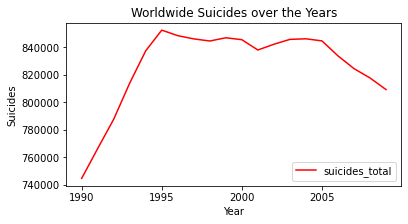

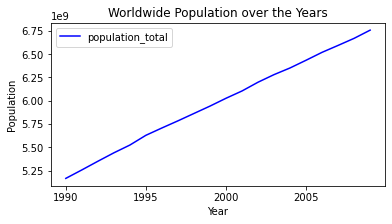

In [23]:
sum_features = df.groupby('year', as_index=False).sum()

plot_linechart(sum_features, 'year', 'suicides_total', 'red', 'Worldwide Suicides over the Years', 'Year', 'Suicides')
plot_linechart(sum_features, 'year', 'population_total', 'blue', 'Worldwide Population over the Years', 'Year', 'Population')

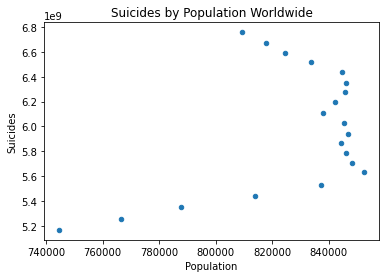

In [24]:
sum_features.plot(
    kind='scatter',
    y='population_total',
    x='suicides_total',
    title='Suicides by Population Worldwide',
    xlabel='Population',
    ylabel='Suicides'
);

### 2. Is there any relation between economic and suicidal numbers of the countries? And what about educational level?

In order to compare better the correlation between the features, I created a new column called *suicidal rate*, that is basically the _number of suicides_ divided by the _total population_ of each country. Also, I took only the last year available, as in general it represents the highest GDP and education leve of the countries, as it has been improving over the time.

Having this considerations, we can plot both _scatterplots_ to compare the correlation between the _GDP per capita_ and _education level_ with the _suicidal rate_ in each country.

1. **GDP per capita:** it almost none correlation with the suicidal rate, as most of the countries have a very low GDP per capita and also suicidal rate, and the points spreads both horizontally and vertically over the chart.

2. **Mean school years (education level):** although the correlation is not so strong as the points are a little spread over the chart on the left side of the X axis, we can see a stronger correlation between it and the suicidal rate. We can say that the higher is the education level, it has a chance that the suicidal rate will be higher also.

We can group the top 20 countries with best education level and compare the average suicidal rate with all the other countries. This will lead to an incredible **166%** higher suicidal rate (0,019% suicidal rate on top countries against 0,011% on the rest of the list), showing that there is a correlation between educational level and suicidal rate on the countries worldwide.

In [25]:
df_2009 = df.query('year == 2009')

df_2009['suicidal_rate'] = df_2009['suicides_total'] / df_2009['population_total']
df_2009.head()

C:\tools\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,country,year,suicides_total,gdp_per_capita,mean_school_years,population_total,continent,suicidal_rate
19,Afghanistan,2009,1750.0,488.0,1.50,28400000.0,Asia,0.000062
46,Angola,2009,1080.0,3550.0,3.95,22500000.0,Africa,0.000048
73,Albania,2009,201.0,3930.0,9.80,2970000.0,Europe,0.000068
127,United Arab Emirates,2009,358.0,36000.0,8.90,7920000.0,Asia,0.000045
154,Argentina,2009,4640.0,9500.0,9.95,40500000.0,Americas,0.000115


In [26]:
def plot_scatterchart(df, x, y, title, xlabel, ylabel):
    df.plot(kind='scatter', x=x, y=y, rot=45, title=title, xlabel=xlabel, ylabel=ylabel);

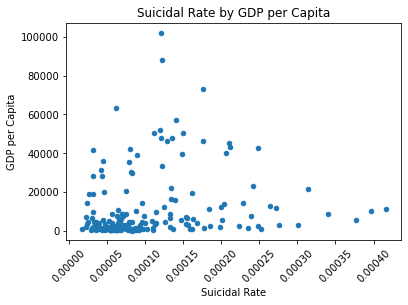

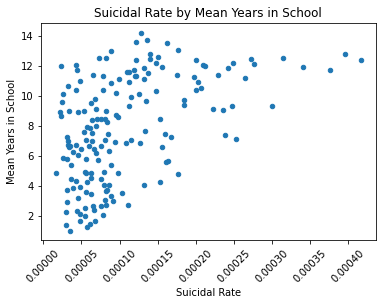

In [27]:
xlabel = 'Suicidal Rate'
plot_scatterchart(df_2009, 'suicidal_rate', 'gdp_per_capita', 'Suicidal Rate by GDP per Capita', xlabel, 'GDP per Capita');
plot_scatterchart(df_2009, 'suicidal_rate', 'mean_school_years', 'Suicidal Rate by Mean Years in School', xlabel, 'Mean Years in School');

In [28]:
top_20 = df_2009.sort_values('mean_school_years', ascending=False).head(20)['suicidal_rate'].mean()
others = df_2009.sort_values('mean_school_years', ascending=True).tail(151)['suicidal_rate'].mean()

print(f'Top 20: {round(top_20 * 100, 3)}%')
print(f'Others: {round(others * 100, 3)}%')
print(f'Difference: {round((top_20 / others) * 100)}%')

Top 20: 0.019%
Others: 0.011%
Difference: 166%


### 3. If we separate the suicidal rate for each continent, how different each one behaves during the period?

Here we have a very interesting behavior. Each continent has a very different **suicidal rate** that is, on average, a horizontal line over the period: this can be seen as we do not have lines crossing through the chart.

1. _Europe_ is the highest _suicidal rate_, but is the most unstable during the period, havin a expressive increase between 1990 and 1995, and then decreasing gradually the rate.

2. _Asia_ has the second highest suicidal rate, but it has been slowly and constantly decreasing over the period, getting closer to the american line each year.

3. _Americas_ are the third highest suicidal rate, being almost a horizontal line over the period, but with a very small increasing rate, especially after the beginning of 21st century.

4. The smallest suicidal rate is from _Africa_, and this is interesting as Africa has the lowest _GDP per Capita_ and also the lowest _educational level_. If we compare the european suicidal rate with african one, the european is almost 338% higher.

In [29]:
df_continent = df.groupby(['continent', 'year'], as_index=False).sum()
df_continent['suicidal_rate'] = df_continent['suicides_total'] / df_continent['population_total']
df_continent.head()

,continent,year,suicides_total,gdp_per_capita,mean_school_years,population_total,suicidal_rate
0,Africa,1990,36716.4,78966.0,123.30,607131600.0,0.000060
1,Africa,1991,37902.7,79226.0,127.45,624106400.0,0.000061
2,Africa,1992,39497.5,79133.0,133.15,643478700.0,0.000061
3,Africa,1993,40620.5,78360.0,137.70,661300100.0,0.000061
4,Africa,1994,42102.7,78026.0,142.50,678170400.0,0.000062


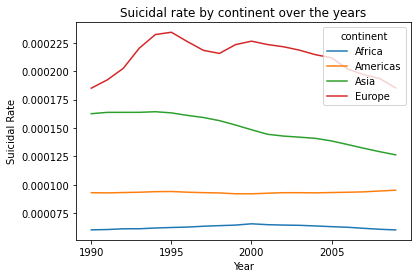

In [33]:
plt.title('Suicidal rate by continent over the years')
plt.xlabel('Year')
plt.ylabel('Suicidal Rate')
plt.locator_params(integer=True)
sns.lineplot(x='year', y='suicidal_rate', data=df_continent, hue='continent');

In [31]:
df.groupby('continent')[['gdp_per_capita', 'mean_school_years']].mean()

,gdp_per_capita,mean_school_years
continent,,
Africa,1942.855681,3.558444
Americas,8748.880000,7.593000
Asia,9631.909774,6.713910
Europe,23149.625313,10.382268


In [32]:
europe = df_continent.query('continent == "Europe"')['suicidal_rate'].mean()
africa = df_continent.query('continent == "Africa"')['suicidal_rate'].mean()

print(f'Difference between Europe and Africa: {round((europe / africa) * 100)}%')

Difference between Europe and Africa: 338%


<a id='conclusions'></a>
## Conclusions

First of all, is important to say that any study with mental health and suicides cannot be analysed only by the numbers, but also needs a social and psychological study to understand all the aspects that can affect the final numbers. This study is just for practice, and lacks of sociological and psychological aspects that are necessary to better understand the object.

This said, looking only for the numbers and data available for this study, we can say three different things about the suicidal numbers between 1990 and 2009:

1. We had a high increasing rate of suicide numbers on the first half of 90', but then it stabilized and begin to decrease on the second half of 00', what means that we are getting better with the mental health and suicidal numbers.

2. We have an interesting correlation between educational level (mean years in school) and suicidal rates: the higher a population stays in schools means a higher chance that the suicidal rate is worse. We cannot take further conclusions on this, as it demands social and psychological studies. This evidence is even stronger if we compare the top 20 educated countries with the rest of the world: the suicidal rate is almost 166% higher on well-educated countries.

3. Each continent has a very different suicidal rate during the period, and the lines do not even cross between them on the chart. The Europe has the higher suicidal rate, and it was unstable during the 2 decades, increasing on the beginning but decreasing at the end. Asia has constantly decreasing with a expressive rate, and both America and Africa had almost no change during the period, being almost horizontal lines on the chart.